# Watch a temperature : scan temperature *v* time

From *APS Python Training for Bluesky Data Acquisition*.

**Objective**

Measure the temperature for a short period and compute basics measures of the collected readings.

## Start the `instrument` package

Our instrument package is in the `bluesky` subdirectory here so we add that to the search path before importing it.

In [ ]:
# first, load the environment variable definitions
%load_ext dotenv
%dotenv env.txt

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(".", "bluesky")))
from instrument.collection import *

I Thu-01:05:53 - ############################################################ startup
I Thu-01:05:53 - logging started
I Thu-01:05:53 - logging level = 10
I Thu-01:05:53 - /home/prjemian/Documents/projects/BCDA-APS/bluesky_instrument_training/bluesky/instrument/collection.py
I Thu-01:05:53 - /home/prjemian/Documents/projects/BCDA-APS/bluesky_instrument_training/bluesky/instrument/mpl/notebook.py
Activating auto-logging. Current session state plus future input saved.
Filename       : /home/prjemian/Documents/projects/BCDA-APS/bluesky_instrument_training/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
I Thu-01:05:53 - #### Bluesky Framework ####
I Thu-01:05:53 - /home/prjemian/Documents/projects/BCDA-APS/bluesky_instrument_training/bluesky/instrument/framework/check_python.py
I Thu-01:05:53 - /home/prjemian/Documents/projects/BCDA-APS/bluesky_instrument_training/bluesky/instrument/framework/check

## Describe

Note the initial settings of the `temperature` (controller).  It's actually an EPICS *swait* record that simulates a temperature sensor and controller.  It has a setpoint, a readback, and a few other support attributes as shown.  A Random noise level is part of the simulation.  We'll compute that noise level from the standard deviation of the measurements.

In [2]:
listdevice(temperature)

============================= =================================== ==========================
name                          value                               timestamp                 
============================= =================================== ==========================
temperature_setpoint          25.0                                2021-05-27 01:05:58.120970
temperature_readback          25.0                                2021-05-27 01:05:58.121581
temperature_done              True                                2021-05-27 01:05:58.123207
temperature_calculation       A+max(-D,min(D,(B-A)))+C*(RNDM-0.5) 2021-05-27 01:05:58.123549
temperature_description       temperature                         2021-05-27 01:05:58.120630
temperature_max_change        2.0                                 2021-05-27 01:05:58.122201
temperature_noise             1.0                                 2021-05-27 01:05:58.121581
temperature_previous_value_pv gp:userCalc8.VAL                    2021

## Count
Use the bluesky RunEngine, `RE`, and a standard plan, `bp.count()`, to count the temperature.

In [3]:
RE(bp.count([temperature]))



Transient Scan ID: 202     Time: 2021-05-27 01:05:58
Persistent Unique Scan ID: 'b2d551df-32b3-4a8a-a2d3-ca86db605bd0'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+
|   seq_num |       time | temperature_readback |
+-----------+------------+----------------------+
|         1 | 01:05:58.5 |             25.00000 |
+-----------+------------+----------------------+
generator count ['b2d551df'] (scan num: 202)


('b2d551df-32b3-4a8a-a2d3-ca86db605bd0',)

Take ten readings by adding the `num=10` keyword argument (a.k.a. *kwarg*).



Transient Scan ID: 203     Time: 2021-05-27 01:05:58
Persistent Unique Scan ID: '77a07d0b-eee0-444b-af00-000504f7a58a'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+
|   seq_num |       time | temperature_readback |
+-----------+------------+----------------------+
|         1 | 01:05:58.9 |             25.00000 |
|         2 | 01:05:59.0 |             25.00000 |
|         3 | 01:05:59.0 |             25.00000 |
|         4 | 01:05:59.0 |             25.00000 |
|         5 | 01:05:59.1 |             25.00000 |
|         6 | 01:05:59.1 |             25.00000 |
|         7 | 01:05:59.1 |             25.00000 |
|         8 | 01:05:59.1 |             25.00000 |
|         9 | 01:05:59.2 |             25.00000 |
|        10 | 01:05:59.2 |             24.62964 |
+-----------+------------+----------------------+
generator count ['77a07d0b'] (scan num: 203)


('77a07d0b-eee0-444b-af00-000504f7a58a',)

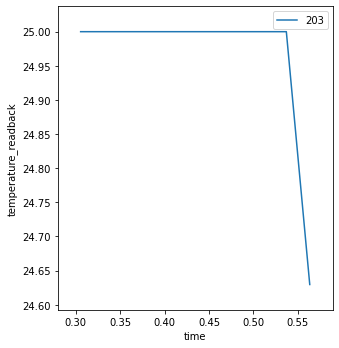

In [4]:
RE(bp.count([temperature], num=10))

Do all the readings look the same?  Perhaps there are only two different values (first one, then the other)?  That's because our measurements were only *reading* the temperature without waiting for it to update.  (If there are two different values, we caught the moment when EPICS updated the calculation.)  The table above showed `temperature_scanning_rate 5` which means EPICS is only updating every 2 seconds.

In [5]:
temperature.scanning_rate.get(as_string=True)

'2 second'

## Adjust the measurement interval
We need to slow down the measurement to this interval by adding the `delay=2` kwarg, sampling every 2 seconds.



Transient Scan ID: 204     Time: 2021-05-27 01:05:59
Persistent Unique Scan ID: 'fccf8cc6-7bf7-40af-bee4-854daf89fc5c'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+
|   seq_num |       time | temperature_readback |
+-----------+------------+----------------------+
|         1 | 01:06:00.0 |             24.62964 |
|         2 | 01:06:01.9 |             25.34347 |
|         3 | 01:06:03.9 |             24.90830 |
|         4 | 01:06:05.9 |             24.95818 |
|         5 | 01:06:07.9 |             24.79804 |
|         6 | 01:06:09.9 |             25.20449 |
|         7 | 01:06:11.9 |             24.83597 |
|         8 | 01:06:14.0 |             24.56481 |
|         9 | 01:06:16.0 |             24.79358 |
|        10 | 01:06:18.0 |             24.56844 |
+-----------+------------+----------------------+
generator count ['fccf8cc6'] (scan num: 204)


('fccf8cc6-7bf7-40af-bee4-854daf89fc5c',)

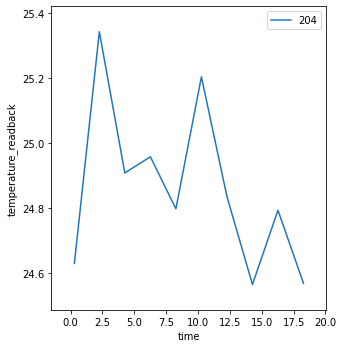

In [6]:
RE(bp.count([temperature], num=10, delay=2))

Let's reduce the update interval that EPICS uses, to the shortest interval EPICS provides, so our measurements do not take so long.

In [7]:
# print the list of possible values
print(temperature.scanning_rate.enum_strs)

# set the shortest interval, by name
temperature.scanning_rate.put(".1 second")
temperature.scanning_rate.get(as_string=True)

('Passive', 'Event', 'I/O Intr', '10 second', '5 second', '2 second', '1 second', '.5 second', '.2 second', '.1 second')


'2 second'

## Collect our measurements
Repeat the measurement, this time with more observations.

Also, we'll add a metadata key:value pair so that later we can find this data more easily in the database.  Most plans take a `md={}` kwarg where the value is a Python dictionary with the key:value pair(s) to add to the run's metadata.



Transient Scan ID: 205     Time: 2021-05-27 01:06:20
Persistent Unique Scan ID: '2f95423a-239b-47c8-bda1-d497363deba5'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+----------------------+
|   seq_num |       time | temperature_readback |
+-----------+------------+----------------------+
|         1 | 01:06:20.8 |             24.88120 |
|         2 | 01:06:20.8 |             25.06445 |
|         3 | 01:06:20.9 |             24.97565 |
|         4 | 01:06:21.0 |             24.85921 |
|         5 | 01:06:21.1 |             25.35698 |
|         6 | 01:06:21.2 |             25.10720 |
|         7 | 01:06:21.3 |             24.51926 |
|         8 | 01:06:21.4 |             25.21276 |
|         9 | 01:06:21.5 |             25.34321 |
|        10 | 01:06:21.6 |             25.31906 |
|        11 | 01:06:21.7 |             25.28996 |
|        12 | 01:06:21.8 |             24.68193 |
|        13 | 01:06:21.9 |             24.59192 |
|        14 | 01:06:22.0 |        

('2f95423a-239b-47c8-bda1-d497363deba5',)

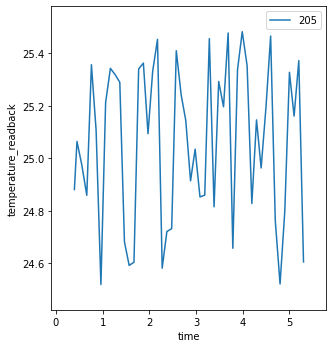

In [8]:
RE(bp.count([temperature], num=50, delay=0.1, md={"motive": "tscan"}))

## Get the data (from the database)
Let's get the measured data from the database now.  It's the most recent bluesky run, so an index of `-1` will identify it.

In [9]:
dataset = cat[-1].primary.read()

Let's get the values as a 1-D numpy array.

In [10]:
T = dataset["temperature_readback"].values

## Compute the statistics
Use the methods of numpy arrays to compute maximum, mean, standard deviation, and minimum.  Looks nicer in a table.

In [11]:
table = pyRestTable.Table()
table.addLabel("measure")
table.addLabel("value")
table.addRow(("max", T.max()))
table.addRow(("mean", T.mean()))
table.addRow(("dev", T.std()))
table.addRow(("min", T.min()))
table.addRow(("#", len(T)))
print(table)

======= ==================
measure value             
======= ==================
max     25.482833600366217
mean    25.062062104219123
dev     0.2976849071829355
min     24.51925688563363 
#       50                
======= ==================



Let's replot that data for comparison.

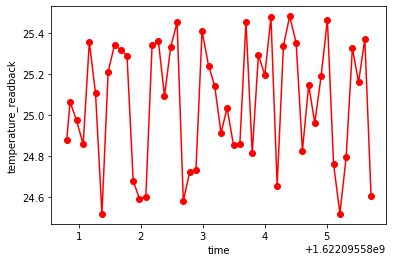

In [12]:
dataset["temperature_readback"].plot(marker="o", color="red")